In [1]:
# %load common.py
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt

import statsmodels.api as sm

import seaborn as sns

def ols(y, x):
    return sm.OLS(y, sm.add_constant(x)).fit()

def load_autos_dataset():
    auto = pd.read_csv('./data/Auto.csv', na_values='?', index_col='name')
    auto = auto.dropna()
    return auto

def load_boston_dataset():
    rdataset = sm.datasets.get_rdataset('Boston', 'MASS', True)
    return rdataset.data

def load_carseats_dataset():
    return pd.read_csv('./data/Carseats.csv', index_col=0)

%matplotlib inline

In [4]:
auto = load_autos_dataset()

In [5]:
auto.shape

(392, 8)

In [3]:
from sklearn.model_selection import train_test_split

In [7]:
def mse_set_validation(df, x_col, y_col):
    train, test = train_test_split(df, test_size=0.5)
    degs = np.arange(10) + 1
    coeffs = [np.polyfit(train[x_col], train[y_col], n) for n in degs]
    fits = [np.polyval(p, test[x_col]) for p in coeffs]
    mses = np.array([np.mean(np.square(test[y_col] - fitted)) for fitted in fits])
    return DataFrame({'degree': degs, 'mse': mses})

In [8]:
once = mse_set_validation(auto, 'horsepower', 'mpg')

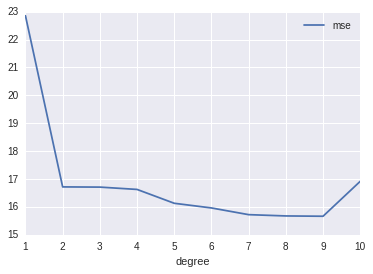

In [52]:
once.plot('degree', 'mse')

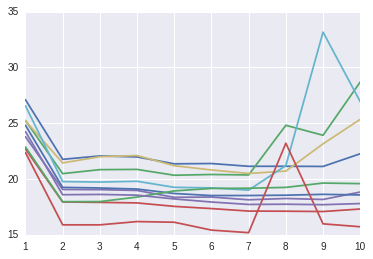

In [28]:
for x in range(10):
    result = mse_set_validation(auto, 'horsepower', 'mpg')
    plt.plot(result['degree'], result['mse'])

In [31]:
from sklearn.model_selection import LeaveOneOut

In [44]:
def loocv_mse(df, x_col, y_col):
    loo = LeaveOneOut()
    degs = np.arange(10) + 1
    final_mses = []
    for (train, test) in loo.split(df):
        train = df.ix[train]
        test = df.ix[test]
        coeffs = [np.polyfit(train[x_col], train[y_col], n) for n in degs]
        fits = [np.polyval(p, test[x_col]) for p in coeffs]
        mses = [np.mean(np.square(f - test[y_col])) for f in fits]
        final_mses.append(mses)
        
    final_mses = np.array(final_mses)
    cvs = np.mean(final_mses, axis=0)
    return DataFrame({ 'degs': degs, 'mses': np.array(cvs)})

In [45]:
result = loocv_mse(auto, 'horsepower', 'mpg')

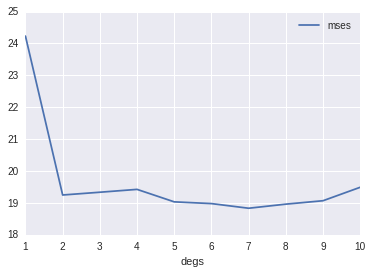

In [46]:
result.plot('degs', 'mses')

In [40]:
a = np.array([[1,1,1], [2,2,2]])
np.mean(a)

1.5

In [42]:
np.mean(a, axis=0)

array([ 1.5,  1.5,  1.5])

In [43]:
np.mean(a, axis=1)

array([ 1.,  2.])